In [60]:
import os
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv("archive/pjm_hourly_est.csv")
df

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN


In [62]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

df[df["AEP"].notna()]["Datetime"].iloc[0]

Timestamp('2004-12-31 01:00:00')

In [63]:
dict_range = {}

for column in df.columns.drop("Datetime"):
    dict_range[column] = (df[df[column].notna()]["Datetime"].iloc[0], df[df[column].notna()]["Datetime"].iloc[-1])

dict_range

{'AEP': (Timestamp('2004-12-31 01:00:00'), Timestamp('2018-01-02 00:00:00')),
 'COMED': (Timestamp('2011-12-31 01:00:00'), Timestamp('2018-01-02 00:00:00')),
 'DAYTON': (Timestamp('2004-12-31 01:00:00'),
  Timestamp('2018-01-02 00:00:00')),
 'DEOK': (Timestamp('2012-12-31 01:00:00'), Timestamp('2018-01-02 00:00:00')),
 'DOM': (Timestamp('2005-12-31 01:00:00'), Timestamp('2018-01-02 00:00:00')),
 'DUQ': (Timestamp('2005-12-31 01:00:00'), Timestamp('2018-01-02 00:00:00')),
 'EKPC': (Timestamp('2013-12-31 01:00:00'), Timestamp('2018-01-02 00:00:00')),
 'FE': (Timestamp('2011-12-31 01:00:00'), Timestamp('2018-01-02 00:00:00')),
 'NI': (Timestamp('2004-12-31 01:00:00'), Timestamp('2010-01-02 00:00:00')),
 'PJME': (Timestamp('2002-12-31 01:00:00'), Timestamp('2018-01-02 00:00:00')),
 'PJMW': (Timestamp('2002-12-31 01:00:00'), Timestamp('2018-01-02 00:00:00')),
 'PJM_Load': (Timestamp('1998-12-31 01:00:00'),
  Timestamp('2001-01-02 00:00:00'))}

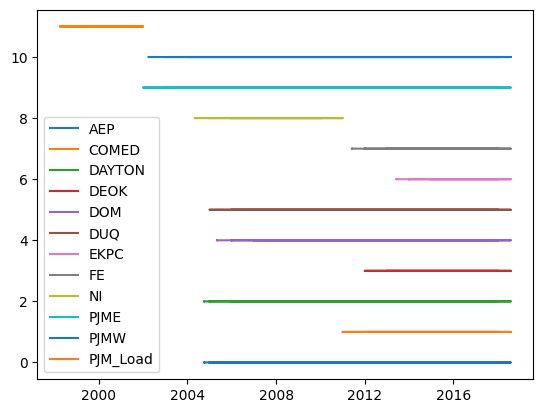

In [64]:
#I want to graphic when the data is available for each column

import matplotlib.pyplot as plt

for i in range(len(df.columns.drop("Datetime"))):
    plt.plot(df["Datetime"], df[df.columns.drop("Datetime")[i]].map(lambda x: x * 0 + i), label = df.columns.drop("Datetime")[i])
    plt.legend()


In [65]:
df["Date"] = df["Datetime"].dt.date

df.drop("Datetime", axis = 1, inplace = True)

df = df.groupby("Date").sum()

df

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Date,,,,,,,,,,,,
1998-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,639716.0
1998-04-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,638539.0
1998-04-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616136.0
1998-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,587690.0
1998-04-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540214.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-30,368834.0,296519.0,48632.0,80624.0,281735.0,40457.0,36661.0,193863.0,0.0,790978.0,131825.0,0.0
2018-07-31,364327.0,295933.0,49226.0,81726.0,294888.0,41635.0,36422.0,195607.0,0.0,828938.0,135858.0,0.0
2018-08-01,363628.0,307690.0,49447.0,80289.0,325913.0,41793.0,34804.0,196392.0,0.0,941539.0,143033.0,0.0


In [66]:
new_df = df.loc[pd.to_datetime("2012-12-31").date():pd.to_datetime("2018-08-13").date()]

new_df.drop(["NI", "PJM_Load"], axis = 1, inplace = True)

new_df

C:\Users\mario\AppData\Local\Temp\ipykernel_23948\1758552858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(["NI", "PJM_Load"], axis = 1, inplace = True)


,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,PJME,PJMW
Date,,,,,,,,,,
2012-12-31,397458.0,262625.0,47448.0,75553.0,297982.0,40769.0,0.0,180540.0,798210.0,148844.0
2013-01-01,363262.0,254325.0,44577.0,70931.0,257275.0,38318.0,0.0,169861.0,730587.0,136822.0
2013-01-02,419942.0,293024.0,54276.0,80503.0,281523.0,43320.0,0.0,205432.0,830969.0,154843.0
2013-01-03,434550.0,298284.0,56095.0,82671.0,302457.0,44038.0,0.0,213705.0,860384.0,162467.0
2013-01-04,429182.0,297474.0,53336.0,78331.0,303536.0,43548.0,0.0,205338.0,836589.0,157859.0
...,...,...,...,...,...,...,...,...,...,...
2018-07-30,368834.0,296519.0,48632.0,80624.0,281735.0,40457.0,36661.0,193863.0,790978.0,131825.0
2018-07-31,364327.0,295933.0,49226.0,81726.0,294888.0,41635.0,36422.0,195607.0,828938.0,135858.0
2018-08-01,363628.0,307690.0,49447.0,80289.0,325913.0,41793.0,34804.0,196392.0,941539.0,143033.0


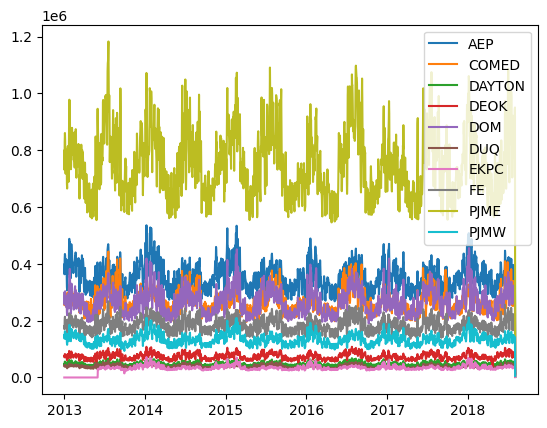

In [67]:
for column in new_df.columns:
    plt.plot(new_df.index, new_df[column], label = column)
    plt.legend()
plt.show()

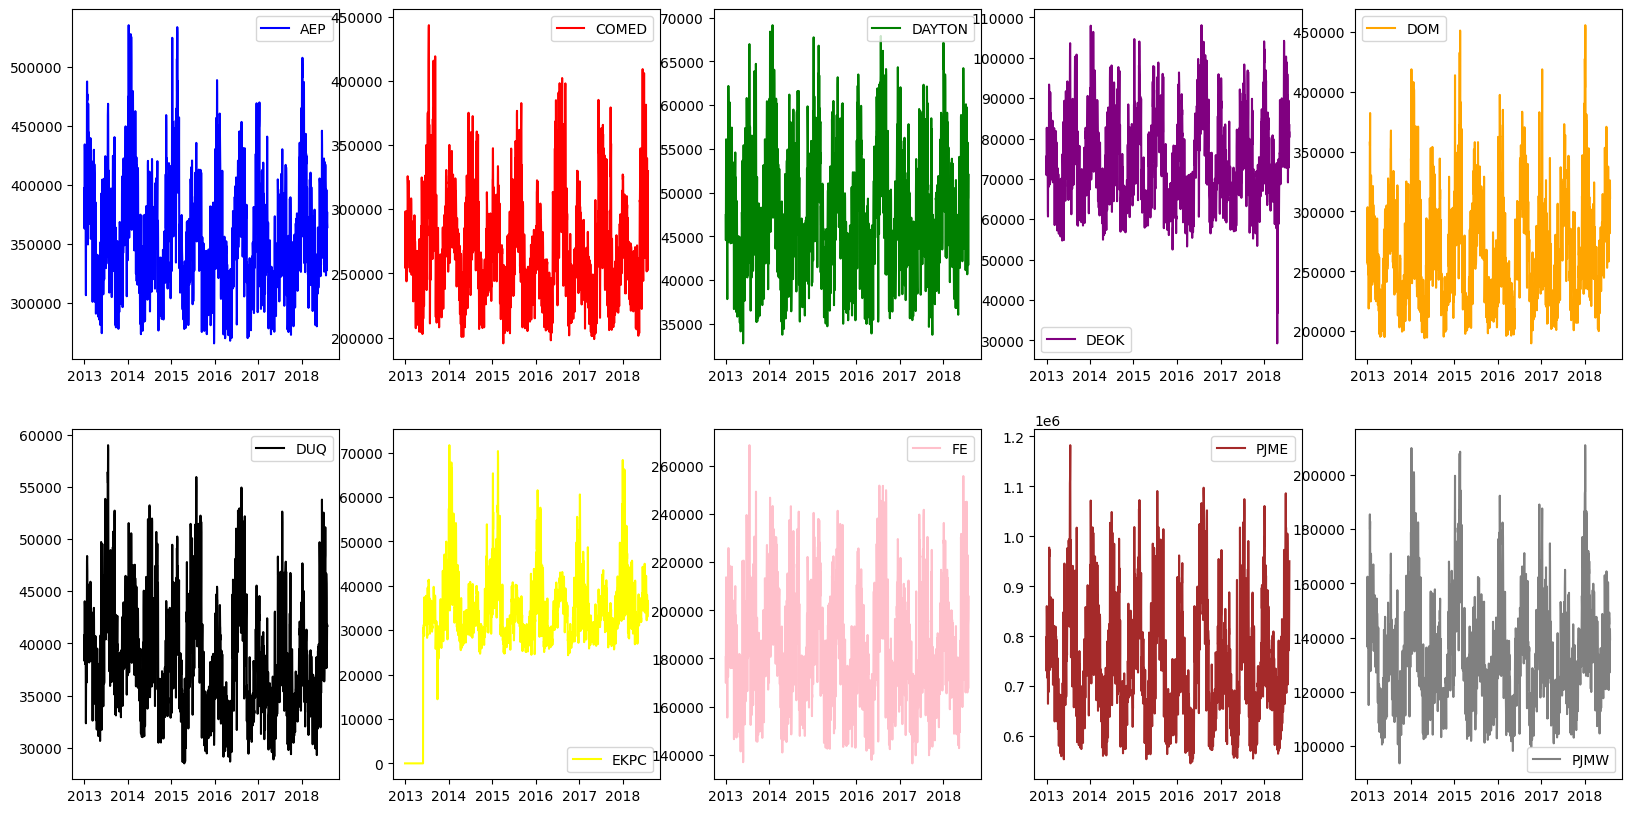

In [71]:
plt.figure(figsize = (20, 10))
colors = ["blue", "red", "green", "purple", "orange", "black", "yellow", "pink", "brown", "grey"]

for i in range(len(new_df.columns)):
    plt.subplot(2, 5, i + 1)
    plt.plot(new_df.index[:-1], new_df[new_df.columns[i]].iloc[:-1], label = new_df.columns[i], color = colors[i])
    plt.legend()
plt.show()

In [68]:
new_df.to_csv("archive/consume_clean.csv")